# SVD for Topic Analysis

We can use SVD to determine what we call ***latent features***.

Let's look at users ratings of different movies. Users rate movies they watched from 1-5. A value of 0 means the user hasn't watched the movie.

| | Matrix | Alien | Serenity | Casablanca | Amelie |
|---|---|---|---|---|
| Alice | 1 | 2 | 2 | 0 | 0 |
| Bob | 3 | 5 | 5 | 0 | 0 |
| Cindy | 4 | 4 | 4 | 0 | 0 |
| Dan | 5 | 5 | 5 | 0 | 0 |
| Emily | 0 | 2 | 0 | 4 | 4 |
| Frank | 0 | 0 | 0 | 5 | 5 |
| Greg | 0 | 1 | 0 | 2 | 2 |

Note that the first three movies (Matrix, Alien, Serenity) are Sci-fi movies and the last two (Casablanca, Amelie) are Romance. We will be able to mathematically pull out these topics!

Let's do the computation with Python.


In [1]:
import numpy as np
import pandas as pd

## Utility matrix `X` with shape `(n, p)`

In [2]:
X = np.array([[1, 2, 2, 0, 0],
              [3, 5, 5, 0, 0],
              [4, 4, 4, 0, 0],
              [5, 5, 5, 0, 0],
              [0, 2, 0, 4, 4],
              [0, 0, 0, 5, 5],
              [0, 1, 0, 2, 2]])

## Rank of `X` 

In [3]:
k = np.linalg.matrix_rank(X)

k

4

## SVD (Singular Value Decomposition)

In [4]:
U, S, V_t = np.linalg.svd(X)

By default, U, S and V_t have shapes `(n, k')`, `(k', k')` and `(k', p)`, where `p' = min(n, p)`.  Let's resize them to `(n, k)`, `(k, k)`, and `(k', p)`

In [5]:
# (for pretty print)
users = ['Alice','Bob','Cindy','Dan','Emily','Frank','Greg']
U = pd.DataFrame(U, index = users)

S = np.diag(S)

movies = ['Matrix','Alien','Serenity','Casablanca','Amelie']
V_t = pd.DataFrame(V_t, columns = movies)

U = U.iloc[:, :k]
S = S[:k, :k]
V_t = V_t.iloc[:k, :]

In [6]:
def pretty_print_UVD():
    global U, S, V_t

    print 'U = '
    print np.around(U, 1)
    print U.shape
    print
    print 'S = '
    print np.around(S, 1)
    print S.shape
    print
    print 'V_t = '
    print np.around(V_t, 1)
    print V_t.shape
    
print 'X = '
print np.around(X, 1)
print X.shape
print
pretty_print_UVD()

X = 
[[1 2 2 0 0]
 [3 5 5 0 0]
 [4 4 4 0 0]
 [5 5 5 0 0]
 [0 2 0 4 4]
 [0 0 0 5 5]
 [0 1 0 2 2]]
(7, 5)

U = 
         0    1    2    3
Alice -0.2  0.0  0.3 -0.3
Bob   -0.5  0.1  0.5 -0.5
Cindy -0.5  0.1 -0.3  0.2
Dan   -0.6  0.1 -0.4  0.2
Emily -0.1 -0.6  0.4  0.5
Frank -0.0 -0.7 -0.4 -0.5
Greg  -0.1 -0.3  0.2  0.3
(7, 4)

S = 
[[ 13.8   0.    0.    0. ]
 [  0.    9.5   0.    0. ]
 [  0.    0.    1.7   0. ]
 [  0.    0.    0.    1. ]]
(4, 4)

V_t = 
   Matrix  Alien  Serenity  Casablanca  Amelie
0    -0.5   -0.6      -0.6        -0.1    -0.1
1     0.1   -0.0       0.1        -0.7    -0.7
2    -0.8    0.6       0.0        -0.1    -0.1
3     0.4    0.5      -0.8        -0.1    -0.1
(4, 5)


## Let's reconstruct `X`

In [7]:
X_p = np.dot(np.dot(U, S), V_t)

np.around(X_p, 1)

array([[ 1.,  2.,  2., -0., -0.],
       [ 3.,  5.,  5., -0., -0.],
       [ 4.,  4.,  4.,  0.,  0.],
       [ 5.,  5.,  5., -0., -0.],
       [ 0.,  2.,  0.,  4.,  4.],
       [-0., -0.,  0.,  5.,  5.],
       [ 0.,  1.,  0.,  2.,  2.]])

## Let's consider the first two topics

We can see that the two topics capture most of the power:

`U` is the ***user-to-topic*** matrix and `V` is the ***movie-to-topic*** matrix.

The third and fourth singular values are relatively small, explaining little of the total variance, so we can exclude them with only a small loss of information. Let's try doing that and reconstruct our matrix!

In [8]:
k = 2

U = U.iloc[:, :k]
S = S[:k, :k]
V_t = V_t.iloc[:k, :]

pretty_print_UVD()

U = 
         0    1
Alice -0.2  0.0
Bob   -0.5  0.1
Cindy -0.5  0.1
Dan   -0.6  0.1
Emily -0.1 -0.6
Frank -0.0 -0.7
Greg  -0.1 -0.3
(7, 2)

S = 
[[ 13.8   0. ]
 [  0.    9.5]]
(2, 2)

V_t = 
   Matrix  Alien  Serenity  Casablanca  Amelie
0    -0.5   -0.6      -0.6        -0.1    -0.1
1     0.1   -0.0       0.1        -0.7    -0.7
(2, 5)


## Let's reconstruct X from these two topics

In [9]:
X_p = np.dot(np.dot(U, S), V_t)

np.around(X_p, 1)

array([[ 1.5,  1.8,  1.8,  0. ,  0. ],
       [ 3.9,  4.7,  4.6,  0. ,  0. ],
       [ 3.5,  4.2,  4.2, -0. , -0. ],
       [ 4.4,  5.3,  5.2, -0. , -0. ],
       [ 0.3,  1.3,  0.4,  4.1,  4.1],
       [-0.4,  0.7, -0.4,  4.9,  4.9],
       [ 0.2,  0.7,  0.2,  2. ,  2. ]])

## Let's now examine the two latent topics

Let's project the axis of user/movie spaces (the vector for each user/movie) down to the topic space. 

Populating the interactive namespace from numpy and matplotlib


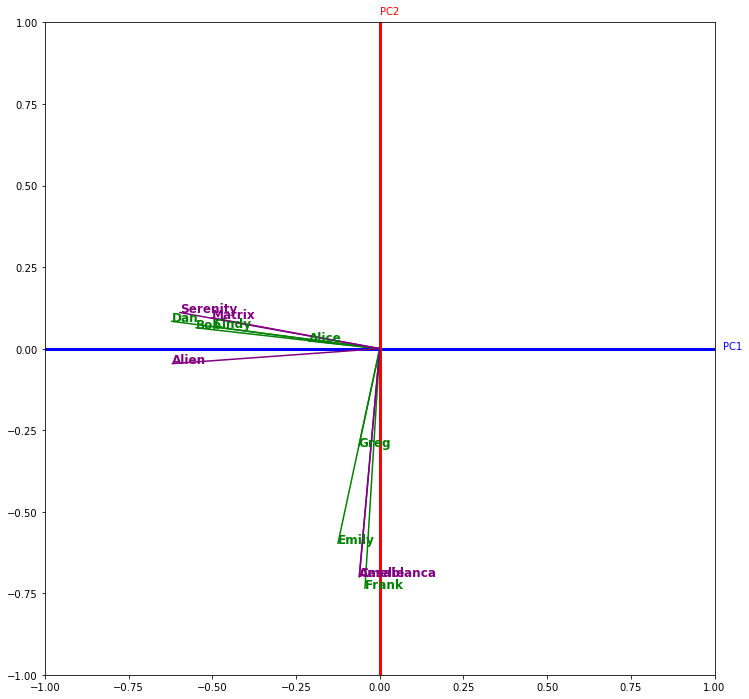

In [10]:
import matplotlib.pyplot as plt
%pylab inline

fig = plt.figure(figsize = (12, 12))

plt.ylim([-1, 1])
plt.xlim([-1, 1])

plt.axhline(0, color = 'blue', lw = 3)
plt.axvline(0, color = 'red', lw = 3)

plt.text(1.025, 0, 'PC1', color = 'blue')
plt.text(0, 1.025, 'PC2', color = 'red')

for i in range(U.shape[0]):
    plt.plot([0, U.iloc[i, 0]], [0, U.iloc[i, 1]], 'k-', color = 'green')
    plt.text(U.iloc[i, 0], U.iloc[i, 1], U.index[i],
             color = 'green', fontdict = {'weight': 'bold', 'size': 12})
for j in range(V_t.shape[1]):
    plt.plot([0, V_t.iloc[0, j]], [0, V_t.iloc[1, j]], 'k-', color = 'purple')
    plt.text(V_t.iloc[0, j], V_t.iloc[1, j], V_t.columns[j],
             color = 'purple', fontdict = {'weight': 'bold', 'size': 12})
    
plt.show()

1. Topic #1
  * First singular value (13.8)
  * First row of the `V` matrix
    * Note that the first three movies have large values here; these movies are science fiction movies; the latent topic is Science Fiction
  * First column of the `U` matrix
    * Note that users 2-4 have relatively large values here; they like science fiction movies

2. Topic #2
  * Second singular value (9.5)
  * Second row of the `V` matrix
    * Note that the last two movies have large values here; these movies are romance movies; the latent topic is Romance
  * Second column of the `U` matrix
    * Note that users 5-6 have large values here; they like romance movies